In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

# no muestra los warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
#función para la cual se evaluará x
# en este caso es una recta que recibe x (dominio), m (pendiente) y n (intersección eje y)
def recta(x, m, n):
    return x*m + n

In [16]:
# función para hacer el video: toma archivos .png y construye un video
# recibe como parámetros image_folder (carpeta donde están los archivos .png guardados) 
#y video_name (nombre archivo de video)
def make_video(image_folder, video_name):
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    images.sort()
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 7, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

In [20]:
# crear un vector x el cual se pueda enviar a una función
x = np.linspace(0, 100, 100)

## Parámetros función
# crear valores de la pendiente para que el gráfico cambie la inclinación y se vea un cambio en el video
ms = np.linspace(1, 10, 100)
n = 1

In [27]:
# Borra los gráficos existentes en 'plot/' para que haga el video con los gráficos que se generarán
# a continuación
files = os.listdir('plots/')
for f in files:
    os.remove('plots/'+f)

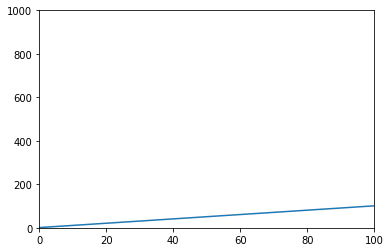

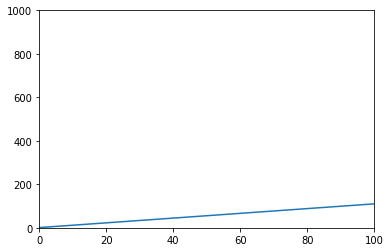

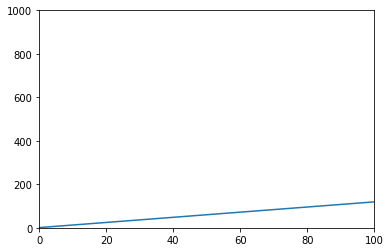

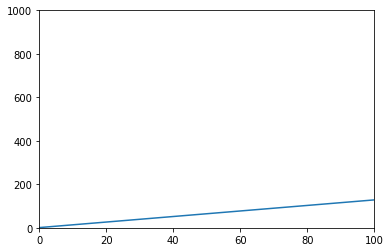

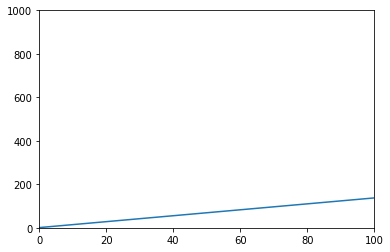

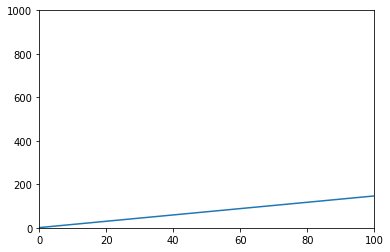

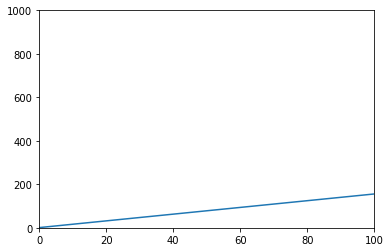

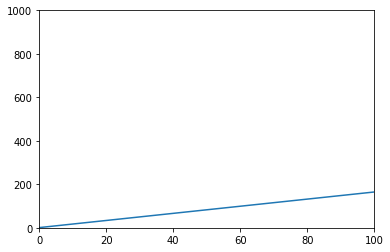

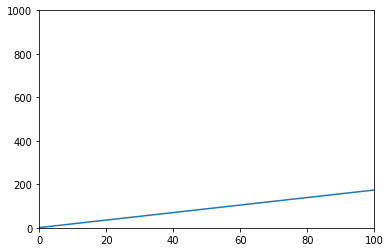

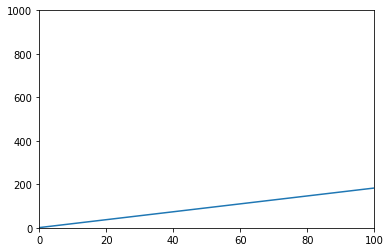

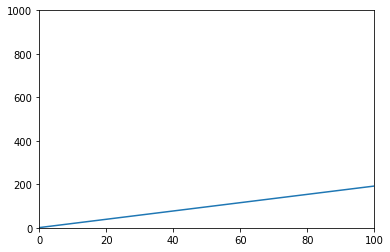

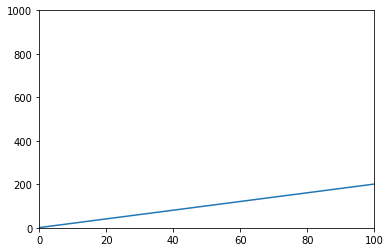

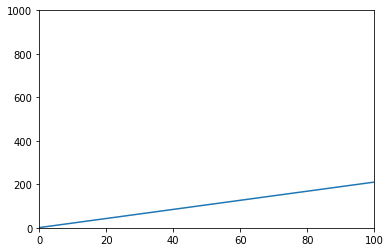

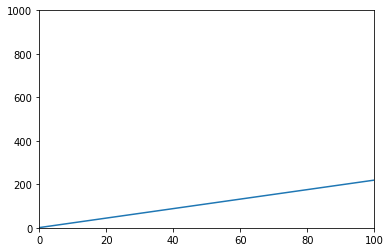

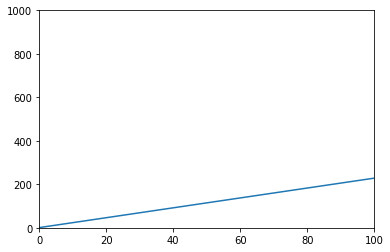

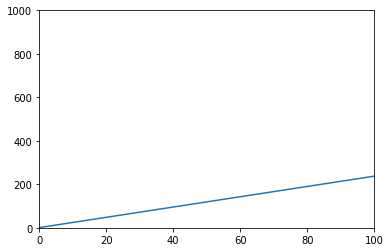

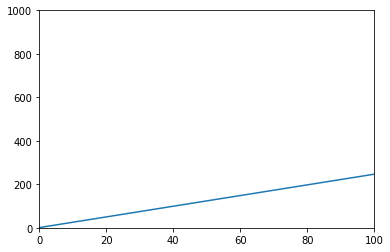

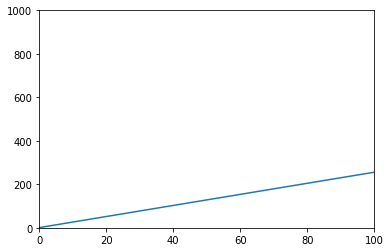

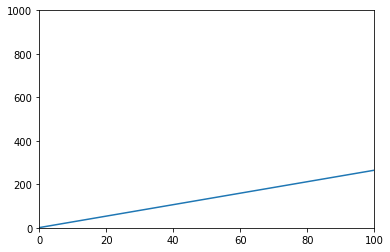

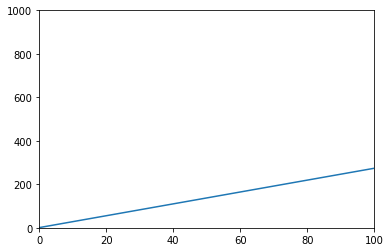

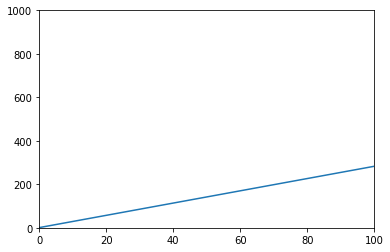

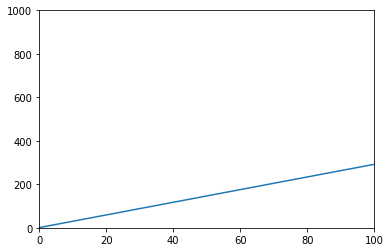

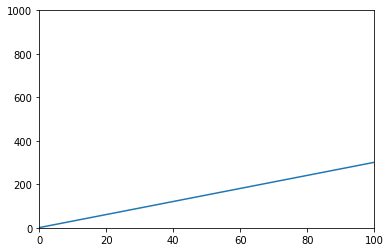

In [ ]:
## ciclo para generar el gráfico con distintos parámetros de m y guardarlos como png
# parámetros son los máximos y mínimos de los ejes x e y. La idea de estos parámetros es que
# los gráficos tengan siempre los mismo límites, de lo contrario, matplotlib ajusta estos límites
# dinámicamente y en el video se verá este cambio en los ejes
x_min = 0
x_max = 100
y_min = 0
y_max = 1000
path = 'plots/' # carpeta en la que se guardan los .png y que se pasa como parámetro a make_video()
for i, m in enumerate(ms):
    plt.figure()
    plt.plot(x, x*m+n)    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    # Esta validación se hace para que cuando tengas más de 100 o 1000 gráficos queden ordenados y el
    # video muestre el orden correcto
    z = ''
    if len(str(i)) == 1:
        z='000'
    elif len(str(i)) == 2:
        z='00'
    elif len(str(i)) == 3:
        z='0'
    plt.savefig(path+'t' +z+ str(i)+ '.png')

In [26]:
# hacer video
make_video('plots/', 'test.avi')